In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
!python --version

Python 3.9.13


In [3]:
#my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data = pd.read_csv("drug200.csv")
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Remove the column containing the target name since it doesn't contain numeric values


In [4]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

## Modify Categorical Variables
Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. pandas.get_dummies() Convert categorical variable into dummy/indicator variables by selecting individual columns.

In [5]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])   #Fit label encoder.
X[:,1] = le_sex.transform(X[:,1])  # Fit label encoder and return encoded labels.

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
y = my_data["Drug"]
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

## Setting up the Decision Tree

In [7]:
from sklearn.model_selection import train_test_split

## Split Parameters
The train_test_split will need the parameters: 
X, y, test_size=0.3, and random_state=3. 

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits

In [8]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [9]:
# your code
print("Train shape:",X_trainset.shape, y_trainset.shape)


Train shape: (140, 5) (140,)


## Modelling
specify criterion="entropy" so we can see the information gain of each node.

In [10]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

In [12]:
predTree = drugTree.predict(X_testset)

In [13]:
## Visually comparing the prediction to the actual values.

In [13]:
print (predTree [0:5])
#print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


## Evaluation

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


## Tree Visualization

Install following package in Anaconda prompt
conda install -c conda-forge pydotplus -y
conda install -c conda-forge python-graphviz -y

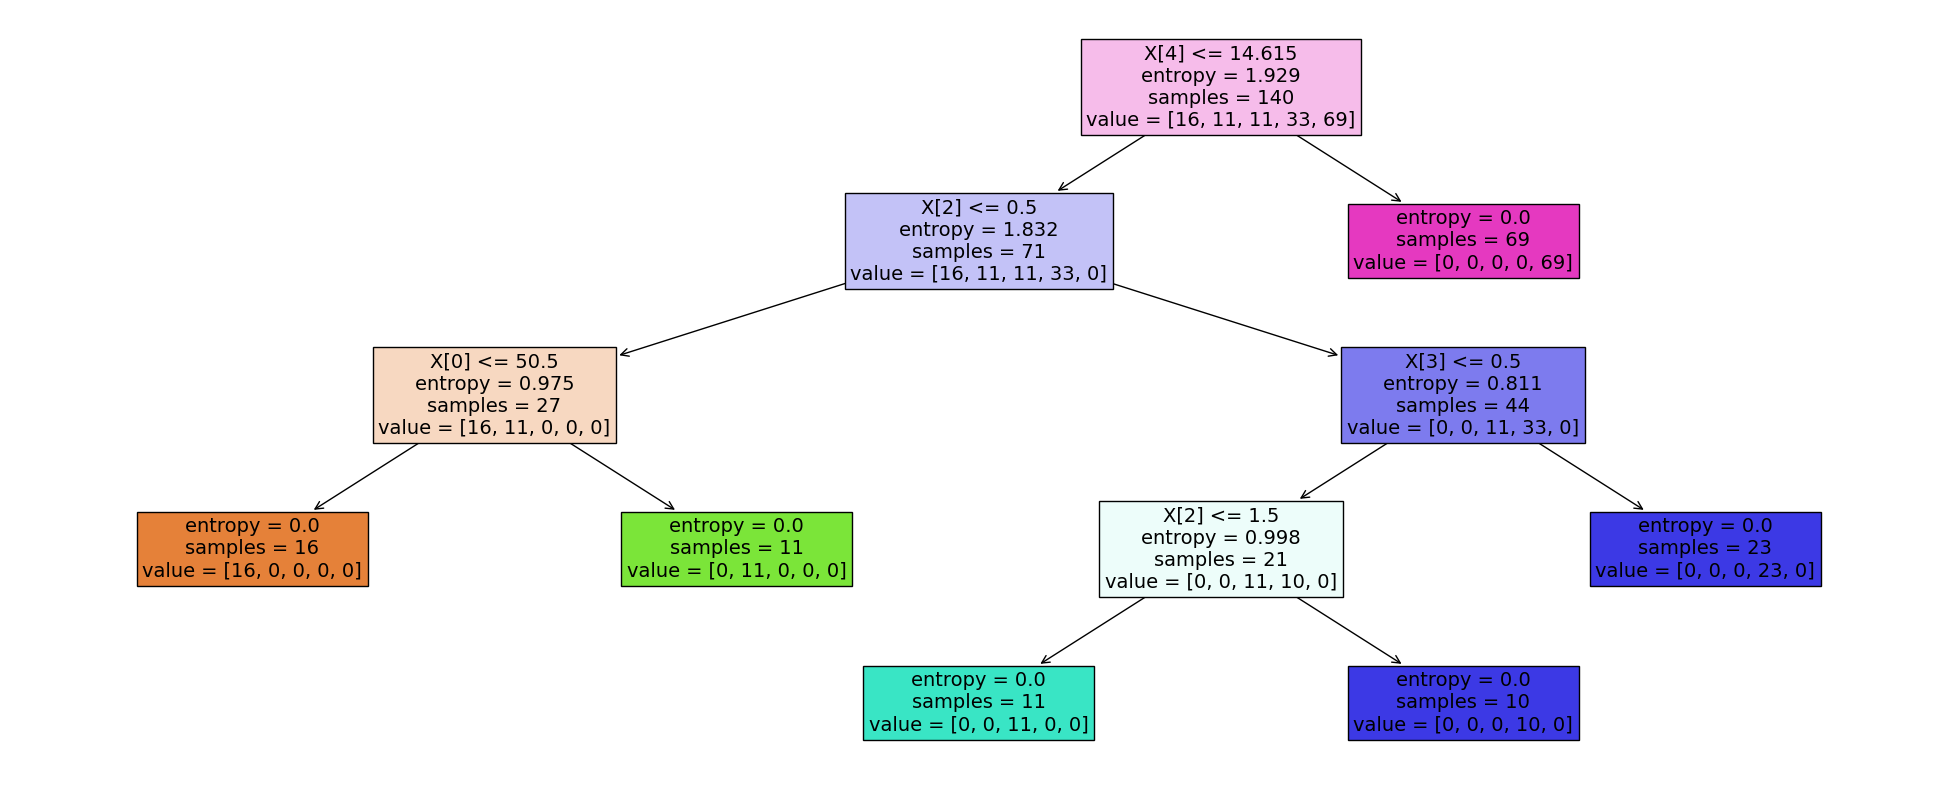

In [15]:
from sklearn import tree
plt.figure(figsize=(25,10))
tree.plot_tree(drugTree,
               filled=True, 
              rounded=False, 
              fontsize=14);
plt.show()